<img src="./../images/data_munging_pycon_with_text.png" width="95%" align="center" alt="Data Wrangling with Python, A Workshop for PyCon India 2023" />  

# Data Munging with Python

**Shaurya Agarwal**

**Versatility**. / ˌvɜr səˈtɪl ɪ ti / noun:   
ability to adapt or be adapted to many different functions or activities.

20+ years  
I consistently hear:  
##### <font color='red'>"Tech's changing so fast, *it's hard to keep up*..."</font>

Do you too?

# @me

* @shauryashaurya on LinkedIn, Facebook.
* @shaurya.shaurya on Instagram 
    * (someone plucked shauryashaurya from under me)
* Two decades
* work at Barnes and Noble LoudCloud
* work on Data, Cloud, Data + Cloud
<br/>

#### Also...
* I write. Plays, screenplays, short stories etc.
* Got to shoot and produce a feature film last year!
    
![8DownToofaanMail](./../images/Eight-Down-Toofaan-Mail-2022-512.jpg)

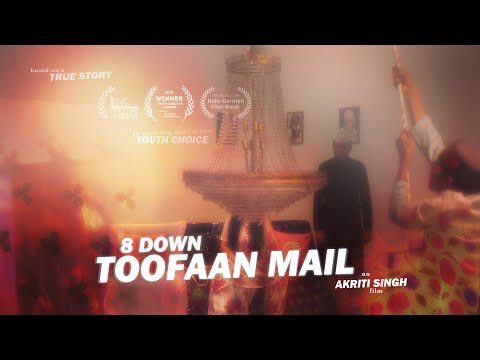

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('KthvCCE2Vrk', width=560, height=315)

Needless to say, I love films.

Hence the [MovieLens](https://grouplens.org/datasets/movielens/) Dataset. :)    
That, and the fact that is easy to grok and super interesting! 

### ...back to that "<font color='red'>*tech changes so fast...*</font>" bit
I always found it odd when folks said it.  
...and couldn't put down why I didn't feel so overwhelmed.  

Then I got to collaborate on a play...  
Antoine de Saint-Exupéry's **"The Little Prince"**  
  
![The Little Prince](http://www5e.biglobe.ne.jp/~p_prince/le_petit_prince_club_prive/img/book/The%20Little%20Prince%206th.jpg)

...and when I read it again, I came across this quote:

#### "If you want to build a ship,  
#### don't drum up people to collect wood and  
#### don't assign them tasks and work, but rather   
#### **teach them to** <font color='red'>long for the endless immensity of the sea.</font>"   
#### -  Antoine de Saint Exupéry  

#### *...teach them to long for the endless immensity of the sea.*

This workshop is my attempt at that.  

See, we get too tangled up in the technology,  
not enough in the *problems it's solving*.  

If we get interested in the data,   
ideas within vs. the data engine...   
  
The complexities of a  
new technology/framework/engine  
*become easy to handle*.  

When we long for the *sea*,  
the *ship* becomes the easy part...  

# Approach

* Here we'll start with plain old Python
* Then gradually cover how each different data engine tries to do better

## What we'll cover
1. Baseline - **Core Python Collections**
1. How **NumPy** improves things
1. Moving on to *DataFrames* in **Pandas**
1. How **Spark (*pySpark*)** enables *data*-parallel distributed out-of-core processing
1. How **Dask** does, *task*-parallel distributed out-of-core processing
1. (time permits) How **Polars** does **Pandas** but bigger, faster etc.

### Honestly
Each of the tech that we'll discuss,  
have more interesting features than can be covered in a few hours.   
  
Typically this workshop runs as a 3 to 5 day event.  
  
So, ... 

## What we'll not cover in this PyCon 2023 session  
1. Specific scenarios like functools, itertools, time-series or categorical data
2. Streaming
3. Data Visualization
4. Database systems / engines
5. Optimization
6. Infrastructure / deployment
7. Data Pipelines
8. Other sundry bits and applesauce

All of this becomes a part of that 3 to 5 day thing.  
We just have 3 hours. :)  

# Interact!

* Ask questions here, even tangents are welcome
* Put up issues, questions, thoughts up as [issues](https://github.com/shauryashaurya/learn-data-munging/issues) directly on the GitHub repo  
    - The stuff we could not cover here, I'll attend to it in the issues!
* Fork the repo, submit a [pull request](https://github.com/shauryashaurya/learn-data-munging/pulls)!

This workshop is continually evolving. I will keep adding new notebooks, topics, exercises etc. as well as explore upcoming frameworks/libraries/engines. Watch this space!

# Let's GO!

You can start by accessing the repo on GitHub

Link: https://github.com/shauryashaurya/learn-data-munging

GitHub -> Search for "*shauryashaurya*" -> ```learn-data-munging```

# Python

* Represents 2D data row-wise in memory, store an entire row, then the next and the next and so on...
* Each row an ```Object``` - all the functions and metadata that Python adds (which in the specific case of Data Analysis *may* be an overhead)

![Row-Wise Representation of Data](./../images/Row-Wise-Representation.drawio.png)

*  Operations that retrieve all the data for a given object (the entire row) are fast, but these whole-row operations are generally rare.
*  Still with Collections, Itertools and Functools - Python is a lot of fun!

# Numpy

* Represent data row-wise (C-Order) or column-wise(Fortran-Order)
* Column Order - all values of a column are contiguous, then values of the next column and the next and so on...

![Row-Wise Representation of Data](./../images/MemoryRepresentation.drawio.png)

* Operations that retrieve all the data for a given object (the entire row) are slower.
* However, for most of our needs - we just want one column or two. For e.g., if we need the average rating of a movie? or if we just wanted to find out the maximum salary in an employee table (from the salary column)?
    - This approach is ***FAST!***
    - We'll cover this in greater detail in the Polars notebook
* Numpy also uses uniform data types - no more Python overhead - that speeds things up too.

# Pandas
* Based on Numpy arrays, borrows from **R**'s data ```plyr``` module
* Split-Apply-Combine approach
* 2.0 can use the **Apache Arrow** backend too - we'll talk about this later

* Columnar representation in memory
* DataFrames grammar to ease data analysis

# Spark

* Distributes data across multiple compute nodes
* Row-wise representation
* Currently the most feature-rich among distributed engines
* Catalyst and Tungsten

Spark has evolved rapidly since its inception.  
2 performance optimization components: **Catalyst** optimizer and **Tungsten** execution engine.  

#### **Catalyst Optimizer**:

Extensible query optimizer framework introduced in Spark SQL.  
Primary purpose is to optimize SQL queries in Spark.  
Also used to optimize DataFrame API operations, which are logically represented as trees of logical operators.  

Here's what Catalyst does:

##### **Catalyst Optimizer**: *Logical Optimization*  
This step involves rule-based optimizations on the logical plan.  
These rules include predicate pushdown, constant folding, and other traditional database optimization rules.  

##### **Catalyst Optimizer**: *Physical Planning*  
Once the logical optimizations are done, Catalyst generates multiple potential physical plans from the logical plans.  
It then chooses the most optimal physical plan based on a cost model.

##### **Catalyst Optimizer**: *Code Generation*  
To achieve better performance, Catalyst generates bytecode on the fly for the chosen physical plan, converting it into compact JVM bytecode.  
[Leverages](https://github.com/apache/spark/blob/master/licenses-binary/LICENSE-janino.txt) [`Janino`](http://janino-compiler.github.io/janino/) and removes much of the overhead that comes from interpreting high-level code.

#### **Tungsten Execution Engine**:
Introduced in Spark 1.4.  
Focuses on improving the efficiency of memory and CPU for Spark computations.  
Goals are to improve the hardware efficiency of Spark jobs and push performance closer to the limits of modern hardware.

##### **Tungsten Execution Engine**: *Memory Management and Binary Processing*  
Spark traditionally relied on the JVM's object model and garbage collection, which are not optimized for big-data needs.  
Tungsten manages memory explicitly and uses off-heap memory to eliminate the overhead of JVM object model and GC.  
It represents data using a binary format, enabling efficient operations without deserializing the data.  

##### **Tungsten Execution Engine**: *Cache-aware computation*  
Tungsten optimizes the layout of data in memory for better cache locality, allowing operations on this data to be performed more quickly.

##### **Tungsten Execution Engine**: *Code Generation*  
Similar to Catalyst, Tungsten generates bytecode for query execution. However, while Catalyst focuses on optimizing SQL operations, Tungsten's code generation aims to optimize the lower-level physical operations (e.g., sorting, shuffling).

# Dask

* Distribute across multiple nodes
* Task based

# Polars

* Distribute across multple nodes
* Columnar representation (**Apache Arrow**)
* *Finally!* amiright?

![Column-Oriented-Storage](./../images/Column-Wise-Representation.drawio.png)

# What Next?

* Several notebooks are a work-in-progress (due to the time I am able to spare these days)  
* Upcoming sections:
	- Build your own data engine from scratch in a day
	- Build your own RegEx engine 
	- More Practice Exercises
* Would love more collaboration from the Community!

# Thank you PyCon India 2023
## You guys are all aces!